In [9]:
import yaml
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import os
#data/lchu/hls/jobs/1600-fair-bs16-2024-01-31_08-05-12.yaml

In [64]:
# input job ID and run this cell and those below it to generate graphs
job_id = "400"

In [65]:
# set up directory paths
root_dir = "/workspace/data/lchu/hls/jobs/"
job_ids = [d for d in os.listdir() if os.path.isdir(d) and d.startswith(job_id)]

yaml_list = [root_dir / pathlib.Path(d) for d in os.listdir(root_dir) if d.startswith(job_id)]

print(yaml_list)

[PosixPath('/workspace/data/lchu/hls/jobs/400-fair-bs16-2024-02-01_01-40-17.yaml'), PosixPath('/workspace/data/lchu/hls/jobs/400-fair-bs16-2024-02-01_01-29-36.yaml'), PosixPath('/workspace/data/lchu/hls/jobs/400-fair-bs16-2024-02-01_01-39-46.yaml'), PosixPath('/workspace/data/lchu/hls/jobs/400-fair-bs16-2024-02-01_01-16-04.yaml')]


In [66]:
for n, yaml_file_path in enumerate(yaml_list):
    with open(yaml_file_path, "r") as file:
        yaml_data = yaml.safe_load(file)
    
    # extract training length from yaml
    training_length = yaml_data["training_length"]
    
    # access the summary file path from the YAML data
    data_file_path = Path(yaml_data["csv_dir"]) / "summary.txt"
    
    # read the .txt file as a CSV using pandas
    df = pd.read_csv(data_file_path, sep=',', header=None)
    
    # define column names
    column_names = ["Epoch",
                    f"Learning Rate {n}",
                    f"Training Loss {n}",
                    f"Training Mask Ratio {n}",
                    f"Training SSIM {n}",
                    f"Training MSE {n}",
                    f"Training MAE {n}",
                    f"Validation Loss {n}",
                    f"Validation Mask Ratio {n}",
                    f"Validation SSIM {n}",
                    f"Validation MSE {n}", 
                    f"Validation MAE {n}"]
    
    df.columns = column_names

    if n == 0:
        stats_df = df

    if n > 0:
        stats_df = stats_df.join(df.set_index('Epoch'), on="Epoch", how="left")

In [67]:
stats_df.columns

Index(['Epoch', 'Learning Rate 0', 'Training Loss 0', 'Training Mask Ratio 0',
       'Training SSIM 0', 'Training MSE 0', 'Training MAE 0',
       'Validation Loss 0', 'Validation Mask Ratio 0', 'Validation SSIM 0',
       'Validation MSE 0', 'Validation MAE 0', 'Learning Rate 1',
       'Training Loss 1', 'Training Mask Ratio 1', 'Training SSIM 1',
       'Training MSE 1', 'Training MAE 1', 'Validation Loss 1',
       'Validation Mask Ratio 1', 'Validation SSIM 1', 'Validation MSE 1',
       'Validation MAE 1', 'Learning Rate 2', 'Training Loss 2',
       'Training Mask Ratio 2', 'Training SSIM 2', 'Training MSE 2',
       'Training MAE 2', 'Validation Loss 2', 'Validation Mask Ratio 2',
       'Validation SSIM 2', 'Validation MSE 2', 'Validation MAE 2',
       'Learning Rate 3', 'Training Loss 3', 'Training Mask Ratio 3',
       'Training SSIM 3', 'Training MSE 3', 'Training MAE 3',
       'Validation Loss 3', 'Validation Mask Ratio 3', 'Validation SSIM 3',
       'Validation MSE 3'

In [68]:
df = stats_df

train_loss = [f'Training Loss {n}' for n in range(4)]
train_mse = [f'Training MSE {n}' for n in range(4)]
train_mae = [f'Training MAE {n}' for n in range(4)]
train_ssim = [f'Training SSIM {n}' for n in range(4)]
val_loss = [f'Validation Loss {n}' for n in range(4)]
val_mse = [f'Validation MSE {n}' for n in range(4)]
val_mae = [f'Validation MAE {n}' for n in range(4)]
val_ssim = [f'Validation SSIM {n}' for n in range(4)]

df['Training Loss Mean'] = df[train_loss].mean(axis=1)
df['Training MSE Mean'] = df[train_mse].mean(axis=1)
df['Training MAE Mean'] = df[train_mae].mean(axis=1)
df['Training SSIM Mean'] = df[train_ssim].mean(axis=1)
df['Validation Loss Mean'] = df[val_loss].mean(axis=1)
df['Validation MSE Mean'] = df[val_mae].mean(axis=1)
df['Validation MAE Mean'] = df[val_mae].mean(axis=1)
df['Validation SSIM Mean'] = df[val_ssim].mean(axis=1)

df['Training Loss Max'] = df[train_loss].max(axis=1)
df['Training MSE Max'] = df[train_mse].max(axis=1)
df['Training MAE Max'] = df[train_mae].max(axis=1)
df['Training SSIM Max'] = df[train_ssim].max(axis=1)
df['Validation Loss Max'] = df[val_loss].max(axis=1)
df['Validation MSE Max'] = df[val_mae].max(axis=1)
df['Validation MAE Max'] = df[val_mae].max(axis=1)
df['Validation SSIM Max'] = df[val_ssim].max(axis=1)

df['Training Loss Min'] = df[train_loss].min(axis=1)
df['Training MSE Min'] = df[train_mse].min(axis=1)
df['Training MAE Min'] = df[train_mae].min(axis=1)
df['Training SSIM Min'] = df[train_ssim].min(axis=1)
df['Validation Loss Min'] = df[val_loss].min(axis=1)
df['Validation MSE Min'] = df[val_mse].min(axis=1)
df['Validation MAE Min'] = df[val_mae].min(axis=1)
df['Validation SSIM Min'] = df[val_ssim].min(axis=1)

In [69]:
df.columns

Index(['Epoch', 'Learning Rate 0', 'Training Loss 0', 'Training Mask Ratio 0',
       'Training SSIM 0', 'Training MSE 0', 'Training MAE 0',
       'Validation Loss 0', 'Validation Mask Ratio 0', 'Validation SSIM 0',
       'Validation MSE 0', 'Validation MAE 0', 'Learning Rate 1',
       'Training Loss 1', 'Training Mask Ratio 1', 'Training SSIM 1',
       'Training MSE 1', 'Training MAE 1', 'Validation Loss 1',
       'Validation Mask Ratio 1', 'Validation SSIM 1', 'Validation MSE 1',
       'Validation MAE 1', 'Learning Rate 2', 'Training Loss 2',
       'Training Mask Ratio 2', 'Training SSIM 2', 'Training MSE 2',
       'Training MAE 2', 'Validation Loss 2', 'Validation Mask Ratio 2',
       'Validation SSIM 2', 'Validation MSE 2', 'Validation MAE 2',
       'Learning Rate 3', 'Training Loss 3', 'Training Mask Ratio 3',
       'Training SSIM 3', 'Training MSE 3', 'Training MAE 3',
       'Validation Loss 3', 'Validation Mask Ratio 3', 'Validation SSIM 3',
       'Validation MSE 3'

In [70]:
print(df.iloc[df["Validation SSIM Max"].idxmax(), [-6, -2, -13,  -9, 0]])

Training MAE Min       0.025421
Validation MAE Min     0.024244
Training SSIM Max      0.946611
Validation SSIM Max    0.955901
Epoch                  9.000000
Name: 8, dtype: float64


/workspace/data/lchu/hls/vis/6231-fair-bs16-2024-01-25_22-04-34/training_graph.png


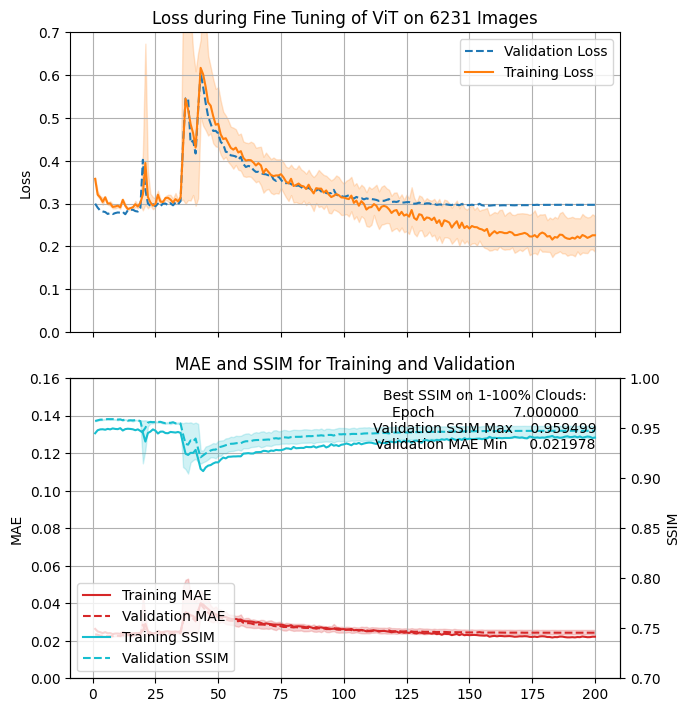

In [28]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 8), sharex=True)

# plotting D Loss and G Loss for both training and validation
ax1.plot(df["Epoch"], df["Validation Loss Mean"], color="tab:blue", linestyle="--", label="Validation Loss")
ax1.plot(df["Epoch"], df["Training Loss Mean"], color="tab:orange", label="Training Loss")

ax1.fill_between(df["Epoch"], df["Training Loss Min"], df["Training Loss Max"], color="tab:orange", alpha=0.2)

ax1.set_ylabel("Loss")
ax1.set_ylim(0, 0.7)
ax1.set_title(f"Loss during Fine Tuning of ViT on {training_length} Images")
plt.suptitle("Best SSIM on 1-100% Clouds:\n" + str(df.iloc[df["Validation SSIM Max"].idxmax(), [0,-9,-2]])[:-24], fontsize=10, y=0.41, x = 0.7)
ax1.legend()
ax1.grid(True)

# plotting MSE and SSIM on separate y-axes
ax2.plot(df["Epoch"], df["Training MAE Mean"], color="tab:red", label="Training MAE")
ax2.plot(df["Epoch"], df["Validation MAE Mean"], color="tab:red", linestyle="--", label="Validation MAE")
ax2.set_ylabel("MAE")
ax2.set_ylim(0, 0.16)

ax2.fill_between(df["Epoch"], df["Validation MAE Min"], df["Validation MAE Max"], color="tab:red", alpha=0.2)

ax2_2 = ax2.twinx()
ax2_2.plot(df["Epoch"], df["Training SSIM Mean"], color="tab:cyan", label="Training SSIM")
ax2_2.plot(df["Epoch"], df["Validation SSIM Mean"], linestyle="--", color="tab:cyan", label="Validation SSIM")
ax2_2.set_ylabel("SSIM")
ax2_2.set_ylim(0.7, 1.0)

ax2_2.fill_between(df["Epoch"], df["Validation SSIM Min"], df["Validation SSIM Max"], color="tab:cyan", alpha=0.2)


# adding legend for the second y-axis
lines, labels = ax2.get_legend_handles_labels()
lines2, labels2 = ax2_2.get_legend_handles_labels()
ax2_2.legend(lines + lines2, labels + labels2)

ax2.set_title("MAE and SSIM for Training and Validation")
ax2.grid(True)

# adjust layout to prevent clipping of labels
plt.tight_layout()
# save graph in visualization directory extracted from yaml data
save_dir = Path(yaml_data["visualization_dir"])
os.makedirs(save_dir, exist_ok=True)
filename = 'training_graph.png'
print(str(save_dir / filename))
plt.savefig(save_dir / filename, format='png')